In [81]:
from scipy import io
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from tqdm import tqdm_notebook
from tqdm import tqdm
from collections import deque

In [82]:
sytleFactorDir = "./bigDataProjectData/styleFactor/styleFactors_20191231.mat"
industryFactorDir = "./bigDataProjectData/industryFactor/industryFactor_20191231.mat"
alphaFactorDir = "./bigDataProjectData/orthFactorExposure/ortheFactors_20200102_2.mat"
closeDir = "./bigDataProjectData/closeStock.mat"

In [83]:
# mat = io.loadmat('yourfile.mat')
alphaFactorMat = io.loadmat(alphaFactorDir)
print(alphaFactorMat.keys())
alphaFactorCube = alphaFactorMat['orthFactors'][0][0][0]
print('alphaFactorCube:', alphaFactorCube.shape)

sytleFactorMat = io.loadmat(sytleFactorDir)
print(sytleFactorMat.keys())
sytleFactorCube = sytleFactorMat['styleSTR'][0][0][1]
print('sytleFactorCube:', sytleFactorCube.shape)

industryFactorMat = h5py.File(industryFactorDir)
print(industryFactorMat.keys())
industryFactorCube = np.transpose(industryFactorMat['industryFactor'])
print('industryFactorCube:', industryFactorCube.shape)

closeMat = io.loadmat(closeDir)
print(closeMat.keys())
close = closeMat['close']
print('close:', close.shape)


# mat = h5py.File('yourfile.mat')

dict_keys(['__header__', '__version__', '__globals__', 'orthFactors', '__function_workspace__'])
alphaFactorCube: (2166, 3842, 29)
dict_keys(['__header__', '__version__', '__globals__', 'styleSTR'])
sytleFactorCube: (2166, 3842, 9)


C:\Users\Evan\AppData\Local\conda\conda\envs\env_futures\lib\site-packages\ipykernel_launcher.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  if sys.path[0] == '':


<KeysViewHDF5 ['industryFactor']>
industryFactorCube: (2166, 3842, 34)
dict_keys(['__header__', '__version__', '__globals__', 'close'])
close: (2166, 3842)


In [80]:
pd.DataFrame(sytleFactorCube[1500:, :, 1])

,0,1,2,3,4,5,6,7,8,9,...,3832,3833,3834,3835,3836,3837,3838,3839,3840,3841
0,0.622148,1.494986,NaN,1.270845,0.713861,1.237918,1.280973,0.973984,1.110437,1.148069,...,0.617412,0.617412,0.617412,0.617412,0.617412,0.617412,0.617412,0.617412,0.617412,0.617412
1,0.617878,1.481492,NaN,1.261641,0.710989,1.228584,1.266253,0.971052,1.100352,1.141712,...,0.608416,0.608416,0.608416,0.608416,0.608416,0.608416,0.608416,0.608416,0.608416,0.608416
2,0.615135,1.470111,NaN,1.251964,0.711659,1.227919,1.262022,0.965142,1.092742,1.132426,...,0.609861,0.609861,0.609861,0.609861,0.609861,0.609861,0.609861,0.609861,0.609861,0.609861
3,0.604198,1.496225,NaN,1.241962,0.712445,1.215867,1.248764,0.963780,1.087600,1.127440,...,0.602229,0.602229,0.602229,0.602229,0.602229,0.602229,0.602229,0.602229,0.602229,0.602229
4,0.600406,1.494059,NaN,1.249040,0.711996,1.214574,1.235867,0.960930,1.086156,1.135192,...,0.594909,0.594909,0.594909,0.594909,0.594909,0.594909,0.594909,0.594909,0.594909,0.594909
5,0.599893,1.491610,NaN,1.239131,0.705866,1.203395,1.234714,0.952757,1.078529,1.137055,...,0.599286,0.599286,0.599286,0.599286,0.599286,0.599286,0.599286,0.599286,0.599286,0.599286
6,0.609578,1.495761,NaN,1.231443,0.699282,1.193771,1.228497,0.944532,1.074948,1.133159,...,0.598551,0.598551,0.598551,0.598551,0.598551,0.598551,0.598551,0.598551,0.598551,0.598551
7,0.614204,1.505000,NaN,1.228669,0.703560,1.197010,1.221171,0.937865,1.067576,1.123431,...,0.596659,0.596659,0.596659,0.596659,0.596659,0.596659,0.596659,0.596659,0.596659,0.596659
8,0.612705,1.492511,NaN,1.227311,0.713197,1.188676,1.213476,0.934455,1.062560,1.131986,...,0.594352,0.594352,0.594352,0.594352,0.594352,0.594352,0.594352,0.594352,0.594352,0.594352
9,0.611073,1.478735,NaN,1.220619,0.716873,1.191475,1.202665,0.926061,1.059595,1.137695,...,0.588882,0.588882,0.588882,0.588882,0.588882,0.588882,0.588882,0.588882,0.588882,0.588882


In [62]:
returnTable = (pd.DataFrame(close)-pd.DataFrame(close).shift(1))/pd.DataFrame(close).shift(1)
returnTable.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,3832,3833,3834,3835,3836,3837,3838,3839,3840,3841
2156,0.001225,0.003789,NaN,NaN,-0.017065,-0.007843,-0.010850,-0.008955,-0.008909,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157,0.006732,-0.002643,NaN,NaN,0.010417,0.003953,0.021938,0.003012,0.011236,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2158,-0.002432,0.011355,NaN,NaN,0.020619,0.015748,-0.008945,0.030030,0.008889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,-0.034126,-0.002620,NaN,NaN,-0.006734,-0.007752,-0.028881,-0.002915,-0.008811,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2160,0.000631,0.003752,NaN,NaN,0.000000,-0.005859,-0.035316,-0.008772,-0.004444,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161,-0.017024,0.009720,NaN,NaN,-0.006780,0.005894,-0.001927,0.008850,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162,0.013470,0.060718,NaN,NaN,0.006826,0.015625,-0.038610,0.023392,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2163,-0.011392,-0.010471,NaN,NaN,0.006780,-0.011538,0.027108,0.002857,-0.002232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,-0.009603,-0.012346,NaN,NaN,-0.010101,0.000000,-0.017595,-0.005698,0.006711,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2165,0.001293,-0.007143,NaN,NaN,0.000000,-0.001946,-0.004975,-0.002865,-0.011111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
d_timeShift = -1
shiftedReturnTable = returnTable.shift(d_timeShift)
shiftedReturnTable.tail(10)


,0,1,2,3,4,5,6,7,8,9,...,3832,3833,3834,3835,3836,3837,3838,3839,3840,3841
2156,0.006732,-0.002643,NaN,NaN,0.010417,0.003953,0.021938,0.003012,0.011236,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157,-0.002432,0.011355,NaN,NaN,0.020619,0.015748,-0.008945,0.030030,0.008889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2158,-0.034126,-0.002620,NaN,NaN,-0.006734,-0.007752,-0.028881,-0.002915,-0.008811,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,0.000631,0.003752,NaN,NaN,0.000000,-0.005859,-0.035316,-0.008772,-0.004444,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2160,-0.017024,0.009720,NaN,NaN,-0.006780,0.005894,-0.001927,0.008850,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161,0.013470,0.060718,NaN,NaN,0.006826,0.015625,-0.038610,0.023392,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162,-0.011392,-0.010471,NaN,NaN,0.006780,-0.011538,0.027108,0.002857,-0.002232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2163,-0.009603,-0.012346,NaN,NaN,-0.010101,0.000000,-0.017595,-0.005698,0.006711,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,0.001293,-0.007143,NaN,NaN,0.000000,-0.001946,-0.004975,-0.002865,-0.011111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Linear predictoin
## 1. simple linear one day





In [65]:
stockScreanTable = np.ones(returnTable.shape)
timeslice = 2161

X_industry = industryFactorCube[timeslice, :, :]
X_style = sytleFactorCube[timeslice, :, :]
X_alpha = alphaFactorCube[timeslice, :, :]
stockScrean = stockScreanTable[timeslice, :]

X_all = np.concatenate([X_industry, X_style, X_alpha], axis= 1)
y_shiftedReturn = shiftedReturnTable.loc[timeslice]
print("shape of X:", X_all.shape, "\nshape of y:", y_shiftedReturn.shape)

IndexError: too many indices for array

In [66]:
toMask = np.concatenate([np.array(y_shiftedReturn).reshape(-1, 1), X_all],axis = 1)
finiteIndex = np.isfinite(toMask).all(axis = 1)
validIndex = np.logical_and(finiteIndex,  stockScrean.astype(bool))
validToCal = toMask[validIndex, :]


print("is there any inf:", np.isinf(validToCal).any())
print("is there any nan:",np.isnan(validToCal).any())
print("validToCal", validToCal.shape)

X = validToCal[:, 1:]
y = validToCal[:, 0]
print("X of ",timeslice , X.shape)
print("y of ",timeslice,  y.shape)

is there any inf: False
is there any nan: False
validToCal (3621, 45)
X of  2161 (3621, 44)
y of  2161 (3621,)


In [9]:
model = LinearRegression(fit_intercept=False, n_jobs = 5)
model.fit(X, y)

saveFactorReturn = True

if saveFactorReturn:
    todayFReturn = model.coef_

In [10]:
timeslice = timeslice+1

X_industry = industryFactorCube[timeslice, :, :]
X_style = sytleFactorCube[timeslice, :, :]
X_alpha = alphaFactorCube[timeslice, :, :]
stockScrean = stockScreanTable[timeslice, :]

X_all = np.concatenate([X_industry, X_style, X_alpha], axis= 1)
y_shiftedReturn = shiftedReturnTable.loc[timeslice]
print("shape of X:", X_all.shape, "\nshape of y:", y_shiftedReturn.shape)

toMask = np.concatenate([np.array(y_shiftedReturn).reshape(-1, 1), X_all],axis = 1)
finiteIndex = np.isfinite(toMask).all(axis = 1)
validIndex = np.logical_and(finiteIndex,  stockScrean.astype(bool))
validToCal = toMask[validIndex, :]


print("is there any inf:", np.isinf(validToCal).any())
print("is there any nan:",np.isnan(validToCal).any())
print("validToCal", validToCal.shape)

X = validToCal[:, 1:]
y = validToCal[:, 0]
print("X of ",timeslice , X.shape)
print("y of ",timeslice,  y.shape)
    
predictReturn = model.predict(X)



# predictReturn
np.corrcoef(predictReturn, y)[0,1]

shape of X: (3842, 72) 
shape of y: (3842,)
is there any inf: False
is there any nan: False
validToCal (3615, 73)
X of  2162 (3615, 72)
y of  2162 (3615,)


-0.10676890867148336

## 2. iter


In [67]:
saveFactorReturn =True

predictReturnTable = np.empty(shiftedReturnTable.shape)
if saveFactorReturn:
    factorReturnTable = np.zeros((shiftedReturnTable.shape[0], 44))
modelIC = np.zeros(shiftedReturnTable.shape[0])


T = 1
modelQueue = deque(maxlen=T)

In [68]:
def getWeightExpectReturn(toWeightReturn):
    return(toWeightReturn.mean(0))

In [69]:
# alphaFactorCube = alphaFactorCube[:, :, 18]
pd.DataFrame(alphaFactorCube)

,0,1,2,3,4,5,6,7,8,9,...,3832,3833,3834,3835,3836,3837,3838,3839,3840,3841
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [77]:
for timeslice in tqdm_notebook(range(1500, shiftedReturnTable.shape[0]-1)):
    
#     tqdm.write("start process:"+str(timeslice))
    
    #slice each table using timeslice
    X_industry = industryFactorCube[timeslice, :, :]
    X_style = sytleFactorCube[timeslice, :, :]
    try:
        X_alpha = alphaFactorCube[timeslice, :, :]
    except:
#         print("only one X_alpha")
        X_alpha = alphaFactorCube[timeslice, :].reshape(-1,1)
        
    stockScrean = stockScreanTable[timeslice, :]

    X_all = np.concatenate([X_industry, X_style, X_alpha], axis= 1)
    y_shiftedReturn = shiftedReturnTable.loc[timeslice]
    print(timeslice, X_all[:, 35])
    
    toMask = np.concatenate([np.array(y_shiftedReturn).reshape(-1, 1), X_all],axis = 1)
    finiteIndex = np.isfinite(toMask).all(axis = 1)
    validIndex = np.logical_and(finiteIndex,  stockScrean.astype(bool))
    validToCal = toMask[validIndex, :]
    
    # rank issue here
    X = validToCal[:, 1:]
    y = validToCal[:, 0]
    
    
    if len(modelQueue)==T:
        toWeightReturn = np.empty((T, shiftedReturnTable.shape[1]))
        for i, aModel in enumerate(modelQueue):
            
            toWeightReturn[i, validIndex] = aModel.predict(X)
            
        predictReturn = getWeightExpectReturn(toWeightReturn)
#         print(predictReturn.shape)
        predictReturnTable[timeslice] = predictReturn
        
        modelIC[timeslice] = np.corrcoef(predictReturn[validIndex], y)[0,1]
    
    model = LinearRegression(fit_intercept=False, n_jobs = 5)
    model.fit(X, y)
    modelQueue.append(model)
    
    if saveFactorReturn:
        todayFReturn = model.coef_
        factorReturnTable[timeslice, :] = todayFReturn

1500 [0.62214828 1.4949857         nan ... 0.61741194 0.61741194 0.61741194]
1501 [0.61787807 1.48149217        nan ... 0.60841633 0.60841633 0.60841633]
1502 [0.61513454 1.47011067        nan ... 0.60986052 0.60986052 0.60986052]
1503 [0.60419782 1.49622535        nan ... 0.60222891 0.60222891 0.60222891]
1504 [0.60040595 1.49405869        nan ... 0.59490889 0.59490889 0.59490889]
1505 [0.59989334 1.49161033        nan ... 0.59928611 0.59928611 0.59928611]
1506 [0.60957771 1.49576133        nan ... 0.59855069 0.59855069 0.59855069]
1507 [0.61420362 1.50499979        nan ... 0.59665916 0.59665916 0.59665916]
1508 [0.61270485 1.49251051        nan ... 0.59435195 0.59435195 0.59435195]
1509 [0.61107259 1.47873523        nan ... 0.58888164 0.58888164 0.58888164]
1510 [0.60848079 1.48287312        nan ... 0.58354144 0.58354144 0.58354144]
1511 [0.60673067 1.47098374        nan ... 0.58125923 0.58125923 0.58125923]
1512 [0.60346779 1.46748094        nan ... 0.57454378 0.57454378 0.57454378]

1712 [1.64408701 2.05997625        nan ... 0.67472902 0.67472902 0.67472902]
1713 [1.63042082 2.05394646        nan ... 0.67011879 0.67011879 0.67011879]
1714 [1.64782065 2.03824699        nan ... 0.6651143  0.6651143  0.6651143 ]
1715 [1.6393822  2.02705315        nan ... 0.65989    0.65989    0.65989   ]
1716 [1.65235384 2.00206942        nan ... 0.65732135 0.65732135 0.65732135]
1717 [1.64719871 2.0182278         nan ... 0.65036485 0.65036485 0.65036485]
1718 [1.63903506 2.00135129        nan ... 0.64999978 0.64999978 0.64999978]
1719 [1.65257124 2.00397539        nan ... 0.64548362 0.64548362 0.64548362]
1720 [1.64572138 1.98658162        nan ... 0.64222828 0.64222828 0.64222828]
1721 [1.64194495 1.99433363        nan ... 0.6454863  0.6454863  0.6454863 ]
1722 [1.6316789  2.03166766        nan ... 0.64056679 0.64056679 0.64056679]
1723 [1.66842443 2.06952008        nan ... 0.65742758 0.65742758 0.65742758]
1724 [1.68849027 2.08563645        nan ... 0.687749   0.687749   0.687749  ]

1924 [1.47752593 1.83983253        nan ... 1.14645307 1.14645307 1.14645307]
1925 [1.46944679 1.84078441        nan ... 1.16434913 1.16434913 1.16434913]
1926 [1.46348143 1.85458116        nan ... 1.16248082 1.16248082 1.16248082]
1927 [1.45307705 1.85225693        nan ... 1.15842025 1.15842025 1.15842025]
1928 [1.43984158 1.84046732        nan ... 1.16322926 1.16322926 1.16322926]
1929 [1.428086   1.82148343        nan ... 1.1544346  1.1544346  1.1544346 ]
1930 [1.41368441 1.79893984        nan ... 1.15587086 1.15587086 1.15587086]
1931 [1.40031947 1.81048769        nan ... 1.15380622 1.15380622 1.15380622]
1932 [1.38429241 1.80663773        nan ... 1.14269437 1.14269437 1.14269437]
1933 [1.37595039 1.80768452        nan ... 1.13839026 1.13839026 1.13839026]
1934 [1.36397087 1.79048705        nan ... 1.15133139 1.15133139 1.15133139]
1935 [1.36089837 1.77342904        nan ... 1.14223026 1.14223026 1.14223026]
1936 [1.35852836 1.78857021        nan ... 1.13708152 1.13708152 1.13708152]

2136 [1.47600194 1.34926994        nan ... 1.07359089 1.07359089 1.07359089]
2137 [1.4884433  1.36581094        nan ... 1.06786974 1.06786974 1.06786974]
2138 [1.51226286 1.37101262        nan ... 1.06131465 1.06131465 1.06131465]
2139 [1.49980212 1.3696899         nan ... 1.05600392 1.05600392 1.05600392]
2140 [1.51212839 1.36117801        nan ... 1.04631168 1.04631168 1.04631168]
2141 [1.49925275 1.35484872        nan ... 1.04096467 1.04096467 1.04096467]
2142 [1.51491952 1.3634263         nan ... 1.04810264 1.04810264 1.04810264]
2143 [1.53018284 1.35803914        nan ... 1.04987644 1.04987644 1.04987644]
2144 [1.52730613 1.35493408        nan ... 1.05109016 1.05109016 1.05109016]
2145 [1.51408316 1.34878036        nan ... 1.04811433 1.04811433 1.04811433]
2146 [1.52669053 1.33721536        nan ... 1.04682573 1.04682573 1.04682573]
2147 [1.51236959 1.32527979        nan ... 1.04037658 1.04037658 1.04037658]
2148 [1.50876588 1.30868609        nan ... 1.03155858 1.03155858 1.03155858]

0.06634688234224975

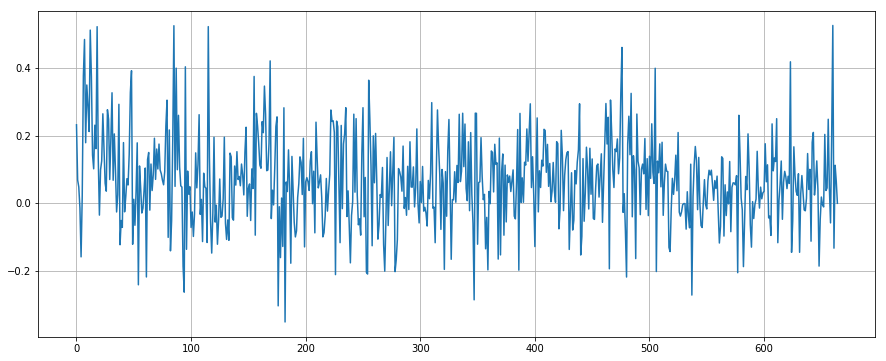

In [71]:
plt.figure(figsize = (15, 6))
plt.plot(modelIC[1500+T:], )
plt.grid()
modelIC[1500+T:].mean()

In [72]:
factorReturnTable[1500:, -1]

array([ 2.88257991e-03,  5.12079402e-03,  3.11328845e-03,  3.44433613e-03,
        2.56874219e-03,  5.05971203e-03,  4.29823070e-03,  4.49220467e-03,
        7.35539164e-03,  5.30677493e-03,  7.43757835e-03,  6.23341355e-03,
        5.72857163e-03,  1.23046282e-02,  8.38675907e-03,  9.78331627e-04,
        1.14821508e-02,  9.14774304e-03,  8.54616735e-03,  1.55833768e-02,
        1.23966014e-02,  5.52920765e-03,  7.91799231e-03,  4.29724791e-03,
        5.98518938e-03,  3.49190855e-03,  3.48252096e-03,  4.82050936e-03,
       -1.18741720e-03,  4.49258539e-03,  5.93590981e-03,  8.31903063e-03,
        7.38916455e-03,  4.63859698e-03,  1.10099086e-02,  4.35618424e-03,
        5.57704661e-03,  3.19474733e-04,  6.57205604e-04,  3.67495121e-03,
       -1.44883259e-03,  6.05165874e-03,  3.22935379e-03,  3.85203124e-03,
        6.82390953e-03,  3.29172462e-03,  2.14765391e-03,  3.02342987e-03,
        5.15828863e-03,  5.64145050e-03,  5.36149935e-03,  5.84064249e-03,
        1.82633837e-03,  